In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/SampleSuperstore.csv')

In [8]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.shape

(9994, 13)

In [10]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [25]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit Margin'],
      dtype='object')

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


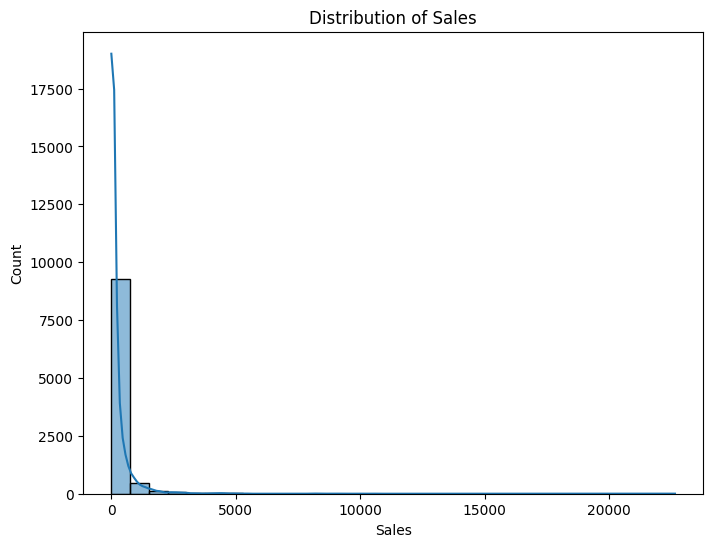

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Sales", bins=30, kde=True)
plt.xlabel("Sales")
plt.ylabel("Count")
plt.title("Distribution of Sales")
plt.show()

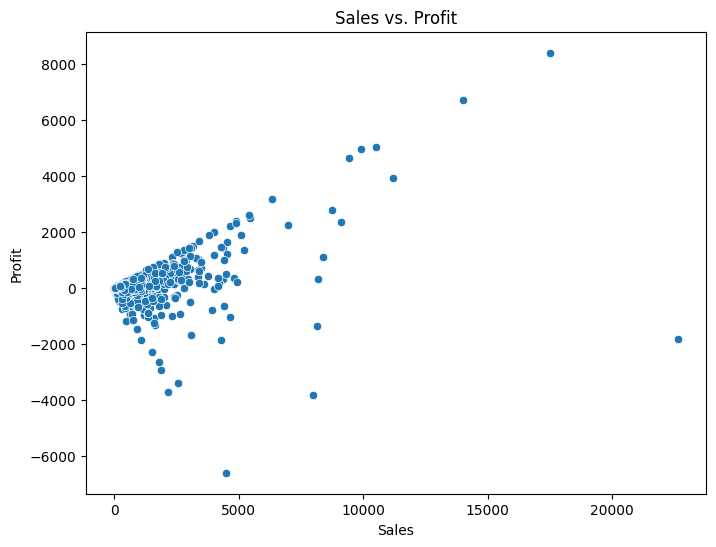

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Sales", y="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs. Profit")
plt.show()

In [15]:
total_profit = df["Profit"].sum()
profit_margin = total_profit / df["Sales"].sum() * 100
print("Total Profit:", total_profit)
print("Profit Margin (%):", profit_margin)

Total Profit: 286397.0217
Profit Margin (%): 12.467217240315604


In [16]:
lowest_categories = df.groupby("Category")["Sales"].sum().sort_values().index[0]
print("Lowest Performing Category:", lowest_categories)

Lowest Performing Category: Office Supplies


In [17]:
df["Profit Margin"] = df["Profit"] / df["Sales"] * 100
lowest_regions = df.groupby("Region")["Profit Margin"].mean().sort_values().index[0]
print("Region with Lowest Profit Margin:", lowest_regions)

Region with Lowest Profit Margin: Central


In [18]:
lowest_subcategories = df.groupby("Sub-Category")["Sales"].sum().sort_values().index[:3]
print("Lowest Performing Sub-Categories:")
print(lowest_subcategories)

Lowest Performing Sub-Categories:
Index(['Fasteners', 'Labels', 'Envelopes'], dtype='object', name='Sub-Category')


In [19]:
lowest_states = df.groupby("State")["Sales"].sum().sort_values().index[:3]
print("States with Lowest Sales:")
print(lowest_states)

States with Lowest Sales:
Index(['North Dakota', 'West Virginia', 'Maine'], dtype='object', name='State')


In [20]:
lowest_segments = df.groupby("Segment")["Sales"].sum().sort_values().index[:3]
print("Lowest Performing Customer Segments:")
print(lowest_segments)

Lowest Performing Customer Segments:
Index(['Home Office', 'Corporate', 'Consumer'], dtype='object', name='Segment')


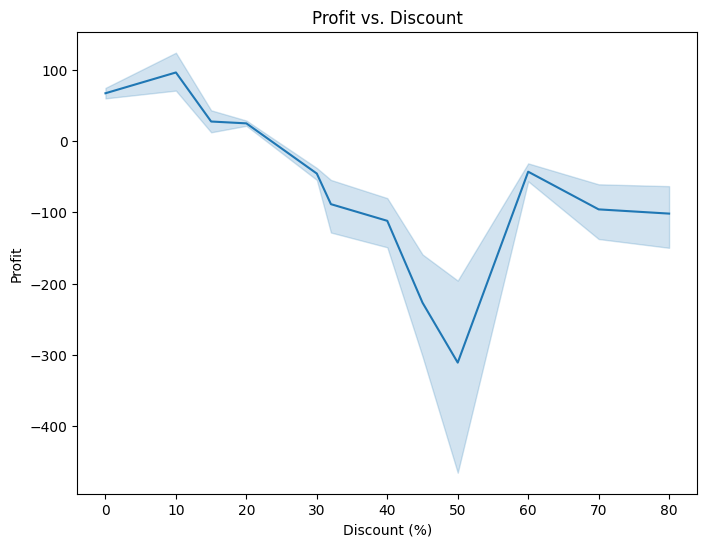

In [21]:
df["Discount"] = df["Discount"] * 100
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Discount", y="Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.title("Profit vs. Discount")
plt.show()

In [22]:
lowest_shipping_modes = df.groupby("Ship Mode")["Profit"].sum().sort_values().index[:3]
print("Shipping Modes with Lowest Profit:")
print(lowest_shipping_modes)

Shipping Modes with Lowest Profit:
Index(['Same Day', 'First Class', 'Second Class'], dtype='object', name='Ship Mode')
